In [1]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

In [2]:
tracks_clust=pd.read_csv("../data/songs_sample.csv")
tracks_clust.head()

,Unnamed: 0,Title,Artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Like a Rolling Stone,Bob Dylan,0.483,0.721,-6.836,0.0320,0.729000,0.000000,0.1890,0.562,95.261,369600
1,1,Smells Like Teen Spirit,Nirvana,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835,300977
2,2,A Day In The Life - Remastered,The Beatles,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413
3,3,Good Vibrations (Mono),The Beach Boys,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574,219147
4,4,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0.725,0.853,-7.842,0.0353,0.034800,0.127000,0.1960,0.904,136.282,222813


In [3]:
tracks_clust.drop("Unnamed: 0",axis=1,inplace=True)
tracks_clust.drop("Title",axis=1,inplace=True)
tracks_clust.drop("Artists",axis=1,inplace=True)
tracks_clust.drop("duration_ms",axis=1,inplace=True)

In [4]:
tracks_clust.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.483,0.721,-6.836,0.0320,0.729000,0.000000,0.1890,0.562,95.261
1,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,0.725,0.853,-7.842,0.0353,0.034800,0.127000,0.1960,0.904,136.282


In [5]:
scaler = StandardScaler()

In [6]:
tracks_scaled = scaler.fit_transform(tracks_clust)
pd.DataFrame(tracks_scaled).head()

,0,1,2,3,4,5,6,7,8
0,-0.481845,0.409299,0.598586,-0.516460,1.387547,-0.444967,-0.008453,-0.060479,-0.948046
1,-0.469756,1.025072,0.027648,-0.280361,-0.922023,-0.376796,-0.337948,0.774640,-0.175476
2,-1.201144,-0.735516,-1.310448,-0.037516,-0.003287,-0.444521,4.727235,-1.637022,1.485545
3,-0.995630,-0.926319,-0.469285,-0.424719,-0.661637,-0.444861,-0.653876,-1.001517,0.423951
4,0.980931,0.981707,0.336439,-0.471938,-0.811809,0.089462,0.036772,1.332745,0.520925


In [7]:
##### Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 20)

# For each model, store the inertia in a list
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                algorithm="full")
    kmeans.fit(tracks_scaled)
    inertia.append(kmeans.inertia_)
    
    

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

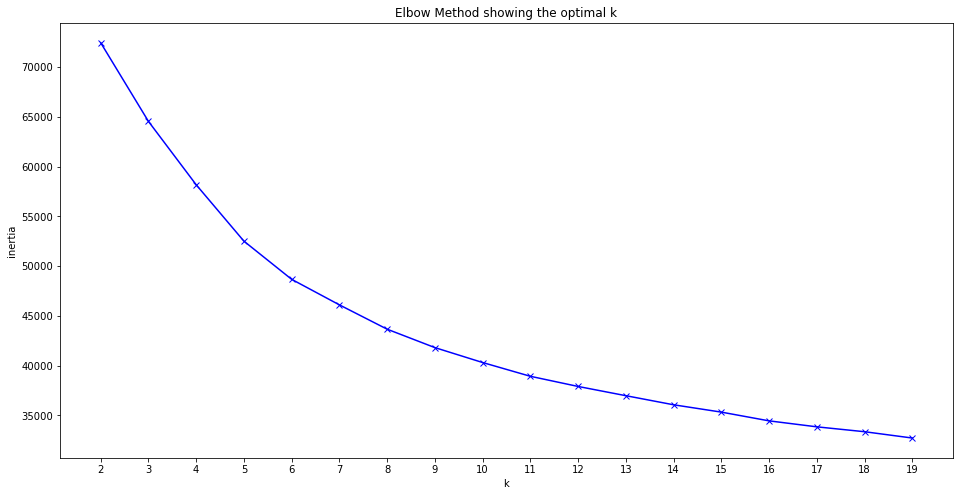

In [8]:
# Plot the results
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [9]:
from sklearn.metrics import silhouette_score

# repeat the same process, now with the silhouette score
K = range(2, 20)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                init="k-means++",
                n_init=10,
                max_iter=50,
                tol=0,
                algorithm="full")
    kmeans.fit(tracks_scaled)
    silhouette.append(silhouette_score(X=tracks_scaled,labels=kmeans.predict(tracks_scaled)))


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

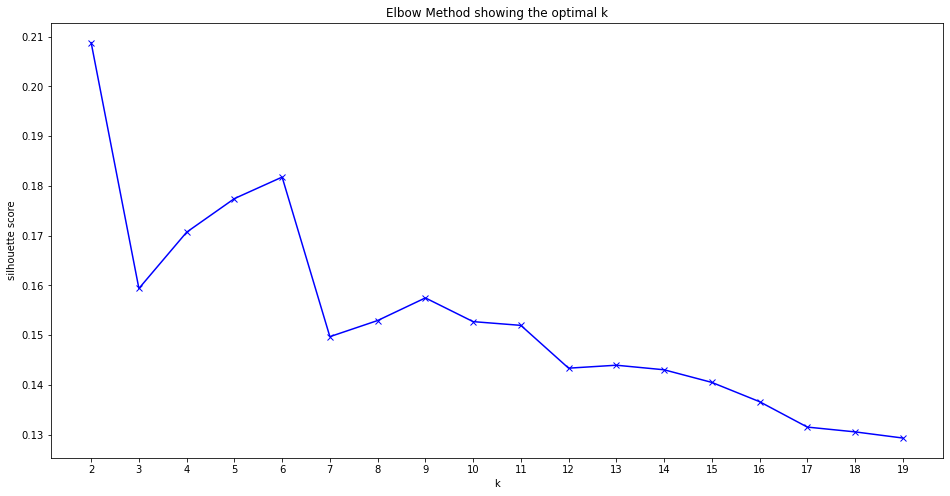

In [10]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [11]:
kmeans = KMeans(n_clusters=6,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                algorithm="full"
                )


In [12]:
# scaler.transform() to the song when the fit_transform has been done on the DataFrame
kmeans.fit(tracks_scaled)

KMeans(algorithm='full', max_iter=50, n_clusters=6, tol=0)

In [13]:
pickle.dump(kmeans, open("kmeans", "wb"))

In [14]:
pickle.dump(scaler, open("scaler", "wb"))

In [15]:
clusters = kmeans.predict(tracks_scaled)

In [16]:
pd.Series(clusters).value_counts()

0    3231
2    2357
1    2091
5     943
3     697
4     617
dtype: int64

In [17]:
final_list=pd.read_csv("../data/songs_sample.csv")
final_list.drop("Unnamed: 0",axis=1,inplace=True)

In [18]:
final_list["Cluster"]= clusters

In [19]:
final_list.head()

,Title,Artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
0,Like a Rolling Stone,Bob Dylan,0.483,0.721,-6.836,0.0320,0.729000,0.000000,0.1890,0.562,95.261,369600,0
1,Smells Like Teen Spirit,Nirvana,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835,300977,0
2,A Day In The Life - Remastered,The Beatles,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,3
3,Good Vibrations (Mono),The Beach Boys,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574,219147,2
4,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0.725,0.853,-7.842,0.0353,0.034800,0.127000,0.1960,0.904,136.282,222813,0


In [20]:
final_list.to_csv("../data/final_list.csv")